In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# You record the time interval between spikes for a neuron, and would like to estimate the spike rate of the neuron from your recordings.

### Assume the actual average spike rate of the neuron is 5 spikes/sec, and simulate what your measured data might look like.

In [27]:
spike_rate_per_sec = 5
observed_interspike_intervals = st.expon.rvs(loc=0, scale=1/spike_rate_per_sec, size=(1000,))

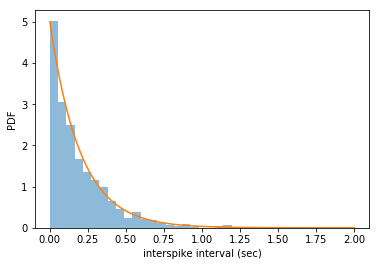

In [6]:
plt.hist(observed_interspike_intervals, 30, density=True, alpha=0.5)
times = np.linspace(0, 2, 100)
plt.plot(times, st.expon.pdf(times, loc=0, scale=1/spike_rate_per_sec))
plt.xlabel('interspike interval (sec)')
plt.ylabel('PDF');

### What is your best estimate of the neurons spike rate based on your simulated data?

In [9]:
mle_loc, mle_scale = st.expon.fit(observed_interspike_intervals, floc=0)
mle_spike_rate_per_sec = 1 / mle_scale
print("Maximum likelihood estimate of spike rate is", mle_spike_rate_per_sec, "per second.")

Maximum likelihood estimate of spike rate is 5.117375194694024 per second.


### How much better is this estimate than other similar spike rates?

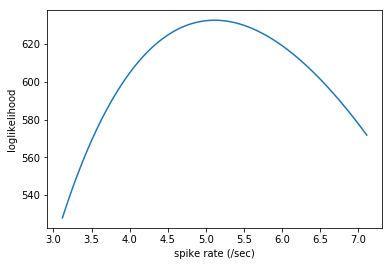

In [11]:
spike_rates = np.linspace(mle_spike_rate_per_sec - 2, mle_spike_rate_per_sec + 2, 100)
loglikelihood = np.zeros(spike_rates.shape)

for i, spike_rate in enumerate(spike_rates):
    loglikelihood[i] = st.expon.logpdf(observed_interspike_intervals, loc=0, scale=1/spike_rate).sum()

plt.plot(spike_rates, loglikelihood)
plt.xlabel('spike rate (/sec)')
plt.ylabel('loglikelihood');

### Let's see how your confidence in your estimate depends on your number of observations?

Maximum likelihood estimate of spike rate for 100 observations is 5.529222913691468 per second.
Maximum likelihood estimate of spike rate for 1000 observations is 5.142976162249624 per second.
Maximum likelihood estimate of spike rate for 2000 observations is 5.169567671297214 per second.


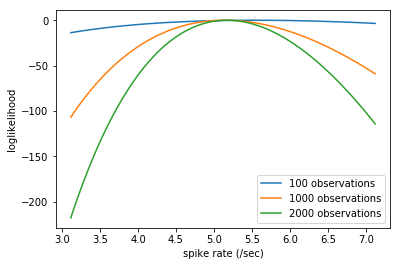

In [29]:
for num_observations in [100, 1000, 2000]:
    observed_interspike_intervals = st.expon.rvs(loc=0, scale=1/spike_rate_per_sec, size=(num_observations,))
    
    mle_loc, mle_scale = st.expon.fit(observed_interspike_intervals, floc=0)
    mle_spike_rate_per_sec = 1 / mle_scale
    print("Maximum likelihood estimate of spike rate for", num_observations, "observations is", mle_spike_rate_per_sec, "per second.")
    
    for i, spike_rate in enumerate(spike_rates):
        loglikelihood[i] = st.expon.logpdf(observed_interspike_intervals, loc=0, scale=1/spike_rate).sum()
    
    label_str = str(num_observations) + " observations"
    plt.plot(spike_rates, loglikelihood - loglikelihood.max(), label=label_str)

plt.xlabel('spike rate (/sec)')
plt.ylabel('loglikelihood')
plt.legend();

### How confident are you in your estimated spike rate? Construct a 95% confidence interval (i.e. an interval of spike rates that you are 95% sure contains the neuron's true average spike rate).

### To do this use the Bootstrap approach.

In [118]:
x = list(range(11))
print(x)
print()

for i in range(5):
    x2 = np.random.choice(x, size=len(x), replace=True)
    print(x2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

[8 3 6 4 1 6 4 9 8 3 1]
[5 2 2 2 2 8 2 5 6 3 6]
[ 4  9  3  6  8  6  6  8  3  5 10]
[ 4 10 10  1  6  1  8  9  8  0  1]
[ 8  2  2  9  2  0 10 10  9 10 10]


Maximum likelihood estimate of spike rate is 4.920581451451985 per second.


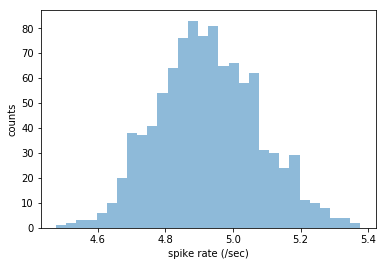

In [119]:
num_observations = 1000
num_bootstrap_sample_sets = 1000

observed_interspike_intervals = st.expon.rvs(loc=0, scale=1/spike_rate_per_sec, size=(num_observations,))

mle_loc, mle_scale = st.expon.fit(observed_interspike_intervals, floc=0)
mle_spike_rate_per_sec = 1 / mle_scale
print("Maximum likelihood estimate of spike rate is", mle_spike_rate_per_sec, "per second.")

bootstrap_interspike_intervals = np.zeros((num_bootstrap_sample_sets, num_observations))
for i in range(num_bootstrap_sample_sets):
    bootstrap_interspike_intervals[i,:] = np.random.choice(observed_interspike_intervals, size=observed_interspike_intervals.shape, replace=True)

bootstrap_spike_rate_estimates = np.zeros((num_bootstrap_sample_sets,))
for i in range(num_bootstrap_sample_sets):
    mle_loc, mle_scale = st.expon.fit(bootstrap_interspike_intervals[i,:], floc=0)
    bootstrap_spike_rate_estimates[i] = 1 / mle_scale

plt.hist(bootstrap_spike_rate_estimates, 30, alpha=0.5)
plt.xlabel('spike rate (/sec)')
plt.ylabel('counts');

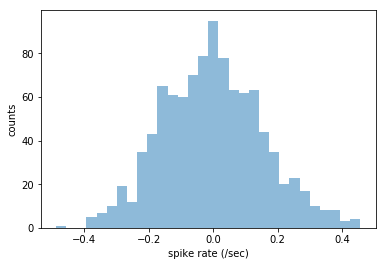

In [39]:
plt.hist(bootstrap_spike_rate_estimates - mle_spike_rate_per_sec, 30, alpha=0.5)
plt.xlabel('spike rate (/sec)')
plt.ylabel('counts');

### Find the 2.5% and 97.5% quantiles from your bootstrapped spike rates.

In [110]:
values = np.arange(21)
limits = np.quantile(values, [0.1, 0.9])

print(values)
print(limits)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 2. 18.]


In [113]:
values = np.array([0, 1, 1, 2, 5, 7, 7, 7, 7, 7, 10])
limits = np.quantile(values, [0.1, 0.9])

print(values)
print(limits)

[ 0  1  1  2  5  7  7  7  7  7 10]
[1. 7.]


In [67]:
confidence_interval_about_mle = np.quantile(bootstrap_spike_rate_estimates - mle_spike_rate_per_sec, [0.025, 0.975])
print("95% confidence interval about", mle_spike_rate_per_sec, "per second is", confidence_interval_about_mle)
print("Maximum likelihood estimate of spike rate is", mle_spike_rate_per_sec, "per second.")
print("95% confidence interval is", mle_spike_rate_per_sec + confidence_interval_about_mle)

95% confidence interval about 5.03008862801567 per second is [-0.28909454  0.32515428]
Maximum likelihood estimate of spike rate is 5.03008862801567 per second.
95% confidence interval is [4.74099409 5.35524291]


### Plot bootstrapped spike rates with MLE estimate and 95% confidence interval indicated.

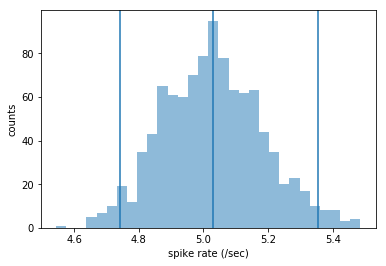

In [73]:
plt.hist(bootstrap_spike_rate_estimates, 30, alpha=0.5)
plt.axvline(mle_spike_rate_per_sec)
plt.axvline(mle_spike_rate_per_sec + confidence_interval_about_mle[0])
plt.axvline(mle_spike_rate_per_sec + confidence_interval_about_mle[1])
plt.xlabel('spike rate (/sec)')
plt.ylabel('counts');

In [48]:
variance_of_estimated_spike_rates = (bootstrap_spike_rate_estimates - mle_spike_rate_per_sec).var()
stdev_of_estimated_spike_rates = np.sqrt(variance_of_estimated_spike_rates)
ci_95 = 1.96 * stdev_of_estimated_spike_rates
print("95% confidence interval about", mle_spike_rate_per_sec, "per second is", [-ci_95, ci_95])
print("Maximum likelihood estimate of spike rate is", mle_spike_rate_per_sec, "per second.")
print("95% confidence interval is", [mle_spike_rate_per_sec - ci_95, mle_spike_rate_per_sec + ci_95])

95% confidence interval about 5.03008862801567 per second is [-0.30319337816115155, 0.30319337816115155]
Maximum likelihood estimate of spike rate is 5.03008862801567 per second.
95% confidence interval is [4.726895249854518, 5.333282006176821]


# You measure a protein's expression level for a series of cells, and would like to estimate both the distribution of expression levels in the entire cell population in this brain region and your confidence in your estimated distribution parameters.

### Assume that expression levels are normally distributed with an average expression level of 50 and standard deviation of 10 across cells. Simulate what your measured data set might look like and plot it with the assumed distribution shown for reference.

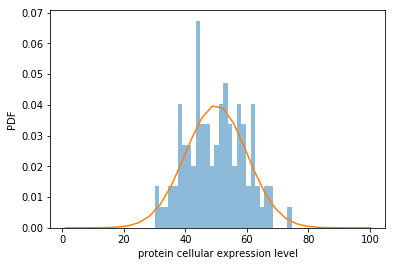

In [94]:
avg_protein_expr_level_per_cell = 50
stdev_of_proteins_expr_levels = 10

num_observations = 100
observed_protein_expr_levels = st.norm.rvs(loc=avg_protein_expr_level_per_cell, scale=stdev_of_proteins_expr_levels, size=(num_observations,))

plt.hist(observed_protein_expr_levels, 30, density=True, alpha=0.5)
x = np.linspace(1, 100, 30)
plt.plot(x, st.norm.pdf(x, loc=avg_protein_expr_level_per_cell, scale=stdev_of_proteins_expr_levels))
plt.xlabel('protein cellular expression level')
plt.ylabel('PDF');

### What is your best guess for the mean and variance in expression levels across cells?

In [95]:
mle_loc, mle_scale = st.norm.fit(observed_protein_expr_levels)
mle_avg_expr_level = mle_loc
mle_stdev_expr_level = mle_scale
print("Maximum likelihood estimate of expression level is", mle_avg_expr_level, "per cell.")
print("Maximum likelihood estimate of stdev in expression levels is", mle_stdev_expr_level)

Maximum likelihood estimate of expression level is 49.92924222520016 per cell.
Maximum likelihood estimate of stdev in expression levels is 9.357275918477676


In [96]:
stdev_of_avg_expr_level = stdev_of_proteins_expr_levels / np.sqrt(num_observations)  # by Central Limit Theorem
estimate_of_stdev_of_avg_expr_level = mle_stdev_expr_level / np.sqrt(num_observations)

stdev_of_avg_expr_level, estimate_of_stdev_of_avg_expr_level

(1.0, 0.9357275918477675)

In [97]:
ci_95 = 1.96 * estimate_of_stdev_of_avg_expr_level
print("Maximum likelihood estimate of expression level is", mle_avg_expr_level, "per cell.")
print("95% confidence interval for expression level is", [mle_avg_expr_level - ci_95, mle_avg_expr_level + ci_95])

Maximum likelihood estimate of expression level is 49.92924222520016 per cell.
95% confidence interval for expression level is [48.09521614517854, 51.763268305221786]


### Use the Bootstrap approach to estimate your confidence in your maximum likelihood parameters.

In [99]:
num_bootstrap_sample_sets = 1000

bootstrap_observations = np.zeros((num_bootstrap_sample_sets, num_observations))
for i in range(num_bootstrap_sample_sets):
    bootstrap_observations[i,:] = np.random.choice(observed_protein_expr_levels, size=observed_protein_expr_levels.shape, replace=True)

bootstrap_avgs = np.zeros((num_bootstrap_sample_sets,))
bootstrap_stdevs = np.zeros((num_bootstrap_sample_sets,))
for i in range(num_bootstrap_sample_sets):
    mle_loc, mle_scale = st.norm.fit(bootstrap_observations[i,:])
    bootstrap_avgs[i] = mle_loc
    bootstrap_stdevs[i] = mle_scale

ci_about_avg = np.quantile(bootstrap_avgs - mle_avg_expr_level, [0.025, 0.975])
ci_about_stdev = np.quantile(bootstrap_stdevs - mle_stdev_expr_level, [0.025, 0.975])

print("Maximum likelihood estimate of expression level is", mle_avg_expr_level, "per cell.")
print("95% confidence interval by CLT is", [mle_avg_expr_level - ci_95, mle_avg_expr_level + ci_95])
print("95% confidence interval by bootstrap is", [mle_avg_expr_level + ci_about_avg])
print()
print("Maximum likelihood estimate of stdev of expression levels is", mle_stdev_expr_level)
print("95% confidence interval by bootstrap is", [mle_stdev_expr_level + ci_about_stdev])

Maximum likelihood estimate of expression level is 49.92924222520016 per cell.
95% confidence interval by CLT is [48.09521614517854, 51.763268305221786]
95% confidence interval by bootstrap is [array([48.04566582, 51.78602865])]

Maximum likelihood estimate of stdev of expression levels is 9.357275918477676
95% confidence interval by bootstrap is [array([ 8.2545712 , 10.38096065])]


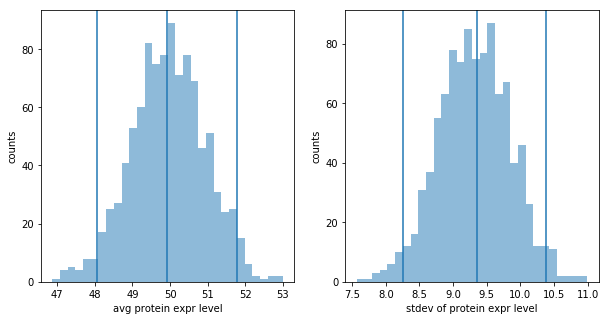

In [100]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.hist(bootstrap_avgs, 30, alpha=0.5)
ax.axvline(mle_avg_expr_level)
ax.axvline(mle_avg_expr_level + ci_about_avg[0])
ax.axvline(mle_avg_expr_level + ci_about_avg[1])
ax.set_xlabel('avg protein expr level')
ax.set_ylabel('counts');

ax = fig.add_subplot(1, 2, 2)
ax.hist(bootstrap_stdevs, 30, alpha=0.5)
ax.axvline(mle_stdev_expr_level)
ax.axvline(mle_stdev_expr_level + ci_about_stdev[0])
ax.axvline(mle_stdev_expr_level + ci_about_stdev[1])
ax.set_xlabel('stdev of protein expr level')
ax.set_ylabel('counts');